# ML Applications Mini Project
Leveraging Machine Learning for Revenue
Optimization via Strategic Couponing

Name : Franzi
Name : Alex



# Loading in the data

In [1]:
import os
import pandas as pd
import numpy as np

my_dire = os.getcwd()
data = pd.read_csv('train.csv', sep=';')


/var/folders/gw/jst10qpx499c9tkkw977rqj00000gn/T/ipykernel_24594/1618948214.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv', sep=';')


taking a look at the data

In [2]:
data.head(5)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
0,41191,2008-12-01,0,0,9,2008-12-01,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,38860,2008-12-16,1,0,4,2008-12-16,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,61917,2008-08-19,0,0,12,2008-08-19,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40647,2008-06-16,1,0,8,2008-06-16,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
4,1347,2008-08-08,0,0,1,2008-08-08,0,1,1,1,...,2,0,0,0,0,0,0,0,0,0


some descriptives

In [3]:
data.describe()

,customernumber,salutation,title,domain,newsletter,model,paymenttype,deliverytype,invoicepostcode,voucher,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
count,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,...,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000,32428.000000
mean,33389.298569,0.541569,0.006969,7.517115,0.169483,1.646910,1.000987,0.201955,48.752282,0.162020,...,0.276644,0.018903,0.047027,0.180986,0.027908,0.023128,0.000185,0.164981,0.092883,0.186598
std,19148.090449,0.657044,0.083192,3.683945,0.375184,0.825981,1.092677,0.401465,24.361425,0.368475,...,1.353981,0.253596,0.434265,0.561751,0.299862,0.401782,0.013601,0.836705,0.610509,0.389594
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16802.750000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,30.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,33552.500000,0.000000,0.000000,9.000000,0.000000,1.000000,1.000000,0.000000,47.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50034.250000,1.000000,0.000000,11.000000,0.000000,2.000000,2.000000,0.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66251.000000,2.000000,1.000000,12.000000,1.000000,3.000000,3.000000,1.000000,99.000000,1.000000,...,90.000000,15.000000,36.000000,14.000000,27.000000,55.000000,1.000000,48.000000,50.000000,1.000000


In [4]:
data.shape

(32428, 38)

## First look at all datatypes

In [5]:
data_types = pd.DataFrame({
    "column": data.columns,
    "dtype" : data.dtypes.values
})
data_types

,column,dtype
0,customernumber,int64
1,date,object
2,salutation,int64
3,title,int64
4,domain,int64
5,datecreated,object
6,newsletter,int64
7,model,int64
8,paymenttype,int64
9,deliverytype,int64


# Transform date variables

In [6]:
date_cols = ["date", "datecreated", "deliverydatepromised", "deliverydatereal"]

for i in date_cols:
    data[i] = pd.to_datetime(data[i], errors = "coerce")

In [7]:
data["delivpostcode"] = data["delivpostcode"].astype("str")
data["invoicepostcode"] = data["invoicepostcode"].astype("str")
# I need to convert those variables into strings as without the explanatory data analysis does not work 

## Exploratory data analysis

In [8]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html("sweetviz_report.html")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Analysis of the variables

## Observing train data
- Take a look at the values of the dependent variable
- Check how many missing values the dataset contains

In [9]:
data["target90"].value_counts(normalize=True)

target90
0    0.813402
1    0.186598
Name: proportion, dtype: float64

In [10]:
# these are the misisng values in the train data
data.isna().sum()[data.isna().sum()>0].sort_values(ascending=False)

advertisingdatacode     25905
deliverydatereal         5472
deliverydatepromised        9
dtype: int64

# Feature engineering

data examplifies the train data thats why I will rename it here

In [11]:
train = data 

In [12]:
train["advertising_missing"] = train["advertisingdatacode"].isna().astype(int)
train["advertising_present"] = 1 - train["advertising_missing"]


If this column is “some tracking code,” then having a code vs not having a code often indicates acquisition channel / campaign tracking, which can correlate with loyalty.


In [13]:
# --- 2) deliverydatereal + deliverydatepromised: missing flags + delay feature ---
train["delivery_real_missing"] = train["deliverydatereal"].isna().astype(int)
train["delivery_promised_missing"] = train["deliverydatepromised"].isna().astype(int)  # optional

# Delivery delay in days (positive = late delivery, negative = early delivery)
train["delivery_delay_days"] = (train["deliverydatereal"] - train["deliverydatepromised"]).dt.days


Missing could mean: not delivered yet, cancelled, different fulfillment logic, data issue, etc. Any of these can be informative.

together with deliverydatepromised, I create


This “delay” is frequently predictive of customer satisfaction and repeat behavior.

In [17]:
print(train["advertising_missing"].value_counts(dropna=False))
print(train["delivery_real_missing"].value_counts(dropna=False))

advertising_missing
1    25905
0     6523
Name: count, dtype: int64
delivery_real_missing
0    26956
1     5472
Name: count, dtype: int64


In [19]:
# drop the columns after having conducted feature engineering
train.drop(columns=["advertisingdatacode", "deliverydatereal"],axis=1,inplace=True)

In [20]:
# Promised delivery calendar features
train["promised_delivery_month"] = train["deliverydatepromised"].dt.month
train["promised_delivery_day"] = train["deliverydatepromised"].dt.day
train["promised_delivery_weekday"] = train["deliverydatepromised"].dt.weekday


In [ ]:
# drop the column
train.drop(columns=["deliverydatepromised"], inplace=True)


In [22]:
train["account_age_days"] = (train["date"] - train["datecreated"]).dt.days
train["order_weekday"] = train["date"].dt.weekday
train["order_month"] = train["date"].dt.month

train.drop(columns=["date", "datecreated"], inplace=True)


In [26]:
# checking the missings again
train.isna().sum().sort_values(ascending=False).head(10)

promised_delivery_weekday    9
promised_delivery_day        9
promised_delivery_month      9
customernumber               0
w10                          0
w3                           0
w4                           0
w5                           0
w6                           0
w7                           0
dtype: int64

Because deliverydatereal was missing → order not delivered / cancelled / special case.



In [25]:
# imputation using median not dropping variables
delay_median = train["delivery_delay_days"].median()
train["delivery_delay_days"].fillna(delay_median, inplace=True)



/var/folders/gw/jst10qpx499c9tkkw977rqj00000gn/T/ipykernel_24594/2126613330.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["delivery_delay_days"].fillna(delay_median, inplace=True)


In [27]:
# we just need the mode for the other variables because the 9 observations are purely negligable
for col in ["promised_delivery_weekday",
            "promised_delivery_day",
            "promised_delivery_month"]:
    train[col].fillna(train[col].mode()[0], inplace=True)

/var/folders/gw/jst10qpx499c9tkkw977rqj00000gn/T/ipykernel_24594/2099322514.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode()[0], inplace=True)


In [28]:
# Define the training and testing set 
X = train.drop(columns=["customernumber", "target90"], axis=1) 
y = train["target90"]
# importnat that customernumber is never used as a feauture

In [ ]:
# checking the missing values again
train.isna().sum().sort_values(ascending=False)
# no missing at all

customernumber               0
salutation                   0
w3                           0
w4                           0
w5                           0
w6                           0
w7                           0
w8                           0
w9                           0
w10                          0
target90                     0
advertising_missing          0
advertising_present          0
delivery_real_missing        0
delivery_promised_missing    0
delivery_delay_days          0
promised_delivery_month      0
promised_delivery_day        0
promised_delivery_weekday    0
account_age_days             0
order_weekday                0
w2                           0
w1                           0
w0                           0
voucher                      0
title                        0
domain                       0
newsletter                   0
model                        0
paymenttype                  0
deliverytype                 0
invoicepostcode              0
delivpos

In [31]:
train.dtypes

customernumber                 int64
salutation                     int64
title                          int64
domain                         int64
newsletter                     int64
model                          int64
paymenttype                    int64
deliverytype                   int64
invoicepostcode               object
delivpostcode                 object
voucher                        int64
case                           int64
numberitems                    int64
gift                           int64
entry                          int64
points                         int64
shippingcosts                  int64
weight                         int64
remi                           int64
cancel                         int64
used                           int64
w0                             int64
w1                             int64
w2                             int64
w3                             int64
w4                             int64
w5                             int64
w

# One hot encoding

Importnat to mention from the documentation : 

- salutation (0,1,2)
- domain (0–12)
- paymenttype (0–3)
- model (1–3)

Optional but can be accepted :
- deliverytype (0/1) → can stay numeric or be encoded
- newsletter (0/1) → can stay numeric


In [32]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ["salutation", "domain", "paymenttype", "model"]

ohe = OneHotEncoder(handle_unknown="ignore",
                    sparse_output=False)

X_cat = ohe.fit_transform(X[categorical_cols])

X_cat = pd.DataFrame(
    X_cat,
    columns= ohe.get_feature_names_out(categorical_cols),
    index= X.index
)

X = pd.concat(
    [X.drop(columns=categorical_cols), X_cat],
    axis=1
)

In [36]:
# lets do some sanity checks to see whether that worked
print("Are there any remaining missing values")
print(X.isna().sum().sort_values(ascending=False).head())

print("\nDtypes:")
print(X.dtypes.value_counts())


print("\nFinal shape:", X.shape)


Are there any remaining missing values
title                        0
delivery_delay_days          0
promised_delivery_day        0
promised_delivery_weekday    0
account_age_days             0
dtype: int64

Dtypes:
int64      30
float64    27
object      2
int32       2
Name: count, dtype: int64

Final shape: (32428, 61)


In [37]:
# what are those two objects that are left
X.select_dtypes(include="object").columns


Index(['invoicepostcode', 'delivpostcode'], dtype='object')

In [38]:
# lets drop those columns and not keep them in any raw form 
X.drop(columns=['invoicepostcode', 'delivpostcode'], axis=1, inplace=True)

In [41]:
X.dtypes.value_counts()
# no missing values left 

int64      30
float64    27
int32       2
Name: count, dtype: int64

In [ ]:
# are there any missings left and are there any objects left
assert X.isna().sum().sum() == 0
assert X.select_dtypes(include="object").shape[1] == 0

print("X is clean and model-ready.")


X is clean and model-ready.


In [43]:
safe = X

# Correlation analysis

## 3.1 correlation of the dependent variable with predictors

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


newsletter       0.083011
shippingcosts   -0.070894
remi             0.065579
deliverytype     0.061510
paymenttype_1    0.061510
numberitems      0.060062
model_3          0.050273
weight           0.043502
entry            0.041292
model_1         -0.039057
w1               0.033917
w5               0.032107
salutation_2    -0.030975
case             0.030245
used             0.029418
dtype: float64

no variable is really hardcore correlated with the dependent variable

## 3.2 correlations between the independet varibale

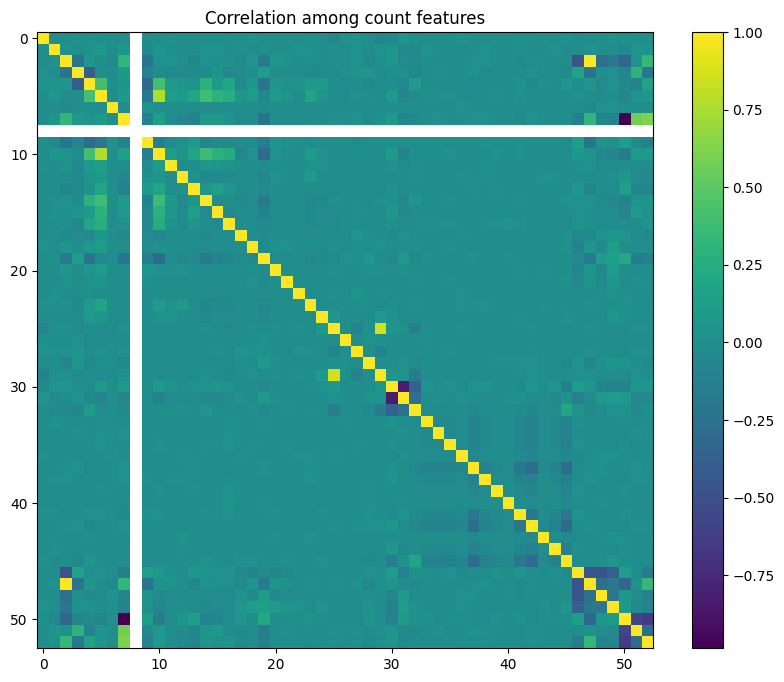

In [53]:
# first all 
corr_vars = X.corr()

import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(corr_vars)
plt.colorbar()
plt.title("Correlation among count features")
plt.show()


## 3.3 mean comparisons for one hot encoded categories

In [ ]:
binos = ["newsletter", "voucher", "gift", "points", "shippingcosts",
    "deliverytype", "entry"]

binos_sum = pd.DataFrame({
    "p_target_given_1": [y[X[v] == 1].mean() for v in binos],
    "p_target_given_0": [y[X[v] == 0].mean() for v in binos]
}, index=binos
)

binos_sum["lift"] = (
    binos_sum["p_target_given_1"] -
    binos_sum["p_target_given_0"]
)

binos_sum.sort_values("lift", ascending=False)
# points has somehow only 0 as ausprägungen

,p_target_given_1,p_target_given_0,lift
newsletter,0.258188,0.171989,0.086199
deliverytype,0.234234,0.174543,0.059691
entry,0.205712,0.173059,0.032653
gift,0.162162,0.186710,-0.024548
voucher,0.160640,0.191617,-0.030977
shippingcosts,0.121007,0.198228,-0.077221
points,NaN,0.186598,NaN
